## Set up environment

In [72]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

## Load the data

In [3]:
# train data
train_data = pd.read_csv("../Data/train.csv", index_col="id")
train_data.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
id,,,,,,,,,,,,,,,,,,,,,
b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg==',M,Y,N,1,D,D,B,0,1,,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8FvkVcSUl2AquMfWqtOqs3AQYGxS13wQv9Tx4GEkPEl5RnbchazqsZcw==',M,Y,Y,1,D,D,B,1,1,,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS9EYdw6Wo8Y5agbzfD6hhsaXZCBdrUQVPpZBXYsODc2PDjER2DX5QcA==',M,Y,Y,1,D,D,B,0,1,,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbisuGUmadvbBh5W28jivd2vgGUWVfHtMdC6vNLrDyFM5NgzILAOorgWGA==',F,Y,Y,1,D,D,B,0,1,,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SVbyppsCh4sW4X5QGqFrLNAcfMQ4NPHOLqbNUVKU-5xxvWCwb5tT91Pw==',M,N,Y,1,B,D,D,1,l,,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [4]:
# test data
test_data = pd.read_csv('../data/test.csv', index_col="id")
test_data.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
id,,,,,,,,,,,,,,,,,,,,,
b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COxmIbpwlUAZ7GnDoMpAhQ_xGA87VuCUtSNnk-E_-PkolKMlmcNtPAzMA==',M,Y,Y,1,B,D,D,0,l,,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsnAmJFQuFmAHCjbjJeEE6aJUlVmJA02kuW14lK9HeBJdmqXUVnFsmALA==',M,Y,Y,1,B,C,B,1,l,,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5W5pKRvJnWatZLzzTcvLbVcRfyHw2UOQKvzKi7iToOaGVGh-uYoFWOA==',M,Y,N,1,B,D,B,1,l,,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPiP5-aXIkXpJO0X4lXqQxprpGyYyQSiqmWJrMwSN7O556m3PvcA9fINw==',M,Y,Y,1,D,D,B,0,1,,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7EpiiKe06Ly0_UuyQcSeti8CqYGO7rlOhkNJlEZxc_wzwgALgWJ61FeA==',M,Y,Y,1,D,C,B,1,1,,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


## Data inside

In [5]:
train_data.shape

(28322, 35)

In [6]:
train_data.describe(include='all')

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
count,28322,28322,28322,28322.000000,28322,28322,28322,28322.000000,28322,28322,...,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
unique,2,2,2,NaN,4,4,4,NaN,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,Y,Y,NaN,D,D,B,NaN,1,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20396,25112,24227,NaN,21028,24013,25010,NaN,20524,25752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.983123,NaN,NaN,NaN,0.433338,NaN,NaN,...,-9.107429,1.612428,5.232644,6.115109,1.699553,0.009992,0.089506,0.497570,2.997740,0.168067
std,NaN,NaN,NaN,0.128814,NaN,NaN,NaN,0.495545,NaN,NaN,...,0.205200,0.173560,2.179705,2.474138,0.115150,0.099462,0.285478,0.289207,2.007611,0.373933
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,...,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000000,0.000101,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,...,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.000000,0.247801,1.000000,0.000000
50%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,...,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.000000,0.495255,3.000000,0.000000
75%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,...,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.000000,0.748786,5.000000,0.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28322 entries, b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg==' to b'gAAAAABinOiZ3mCQAtoJFXj-Ymjhi9FbbZ_Ypi5gDoAEYe1Cx66GhkhZ5UIJNLcPlgrRyfpabvIwD5ok1GxipWfkujjwXyMMBw=='
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  28322 non-null  object 
 1   s11     28322 non-null  object 
 2   s12     28322 non-null  object 
 3   s13     28322 non-null  int64  
 4   s16     28322 non-null  object 
 5   s17     28322 non-null  object 
 6   s18     28322 non-null  object 
 7   s48     28322 non-null  int64  
 8   s52     28322 non-null  object 
 9   s53     28322 non-null  object 
 10  s54     2628 non-null   object 
 11  s55     3206 non-null   object 
 12  s56     0 non-null      float64
 13  s57     0 non-null      float64
 14  s58     28322 non-null  object 
 15  s59     0 non-null      float64
 16  s69     28322 non-null  o

In [8]:
missing_values_cols_train = train_data.isnull().sum()
print(missing_values_cols_train)

gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64


In [9]:
missing_values_cols_test = test_data.isnull().sum()
print(missing_values_cols_test)

gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       77322
s55       75644
s56       85065
s57       85065
s58           0
s59       85065
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
dtype: int64


In [10]:
train_data.drop(["s54", "s55", "s56", "s57", "s59"], axis=1, inplace=True)
test_data.drop(["s54", "s55", "s56", "s57", "s59"], axis=1, inplace=True)

### Categorical and numerical data divided

In [11]:
# Unique value of train dataset
print("Unique value of train dataset:\n\n")
for col in train_data:
    print(col, ": ", len(train_data[col].unique()), " -> ", train_data[col].unique())

Unique value of train dataset:


gender :  2  ->  ['M' 'F']
s11 :  2  ->  ['Y' 'N']
s12 :  2  ->  ['N' 'Y']
s13 :  2  ->  [1 0]
s16 :  4  ->  ['D' 'B' 'C' 'A']
s17 :  4  ->  ['D' 'C' 'B' 'A']
s18 :  4  ->  ['B' 'D' 'C' 'A']
s48 :  2  ->  [0 1]
s52 :  4  ->  ['1' 'l' '0' 'o']
s53 :  2  ->  ['  ' ' ']
s58 :  2  ->  ['B' 'A']
s69 :  4  ->  ['x' '~1' 'C`' '0']
s70 :  4  ->  ['op: D' 'op: C' 'op: B' 'op: A']
s71 :  4  ->  ['b' 'd' 'c' 'a']
n1 :  28321  ->  [16.14466597  7.14455819  6.92323603 ... 13.42979701 16.09462206
  7.05810713]
n2 :  28320  ->  [1.98944148 0.8448659  1.04201802 ... 1.80056198 2.43828046 1.02317194]
n3 :  10  ->  [2 3 6 9 7 8 4 0 5 1]
n4 :  28321  ->  [2.31838468 6.19776785 7.82440091 ... 7.76338648 6.94276637 5.94202455]
n5 :  28290  ->  [-32.83927744 -32.5765972  -32.51054438 ... -32.57597474 -32.57756295
 -32.84889674]
n6 :  28299  ->  [0.01717551 0.01385715 0.01394339 ... 0.01778231 0.00732437 0.01592836]
n7 :  28320  ->  [-9.12605619 -9.09828731 -9.2348943  ... -9

In [12]:
train_data.drop(["s53"], axis=1, inplace=True)
test_data.drop(["s53"], axis=1, inplace=True)

In [13]:
categorical_cols = []
numerical_cols = []

for col in train_data:
    if len(train_data[col].unique()) < 11:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print("Categorical columns: ", categorical_cols)
print("\nNumerical columns: ", numerical_cols)

Categorical columns:  ['gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52', 's58', 's69', 's70', 's71', 'n3', 'n12', 'n13', 'n15', 'label']

Numerical columns:  ['n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n14']


## Data Visualization

### For - Numerical Data

In [61]:
numerical_train_data = train_data[numerical_cols+['label']]

In [62]:
numerical_train_data.shape

(28322, 12)

In [63]:
numerical_train_data

,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n14,label
id,,,,,,,,,,,,
b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg==',16.144666,1.989441,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0.631220,0
b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8FvkVcSUl2AquMfWqtOqs3AQYGxS13wQv9Tx4GEkPEl5RnbchazqsZcw==',7.144558,0.844866,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0.392746,1
b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS9EYdw6Wo8Y5agbzfD6hhsaXZCBdrUQVPpZBXYsODc2PDjER2DX5QcA==',6.923236,1.042018,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0.222537,0
b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbisuGUmadvbBh5W28jivd2vgGUWVfHtMdC6vNLrDyFM5NgzILAOorgWGA==',5.749840,0.781439,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0.154409,0
b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SVbyppsCh4sW4X5QGqFrLNAcfMQ4NPHOLqbNUVKU-5xxvWCwb5tT91Pw==',14.771959,1.248188,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0.737560,0
...,...,...,...,...,...,...,...,...,...,...,...,...
b'gAAAAABinOiX2ss5U2ZT5zFd8zf7HcBDWPvbivNz5wAy6zrd3qi2I3cE2DHE2japRI_8efkRXs2QiAWxsET85tn6ifcWYCjfdA==',16.375618,2.480253,4.693939,-33.086259,0.007216,-8.651173,1.877460,3.637551,11.404942,1.862441,0.019793,0
b'gAAAAABinOiabmEADrCTZQktCKiahJkR_0kDa_8WOlosGAhSSgdWVQbeXARaW2ihBenmE0O2985LU-QzxLdzozoV1RmYesxlBQ==',14.746677,2.035971,7.939976,-32.775474,0.013369,-8.833046,1.559138,4.247487,5.530054,1.671527,0.371074,0
b'gAAAAABinOicscC37w1W9uiIlYL1U5D_mUtmgdUg8QTlgTDiCQj0N8l5xVuD5tTmGrYgogJLq-v9Z6fCyGeAng__ulkRJQi-Xg==',13.429797,1.800562,7.763386,-32.575975,0.017782,-9.233722,1.455911,2.900249,6.058681,1.627479,0.826587,0


<AxesSubplot:xlabel='label', ylabel='n1'>

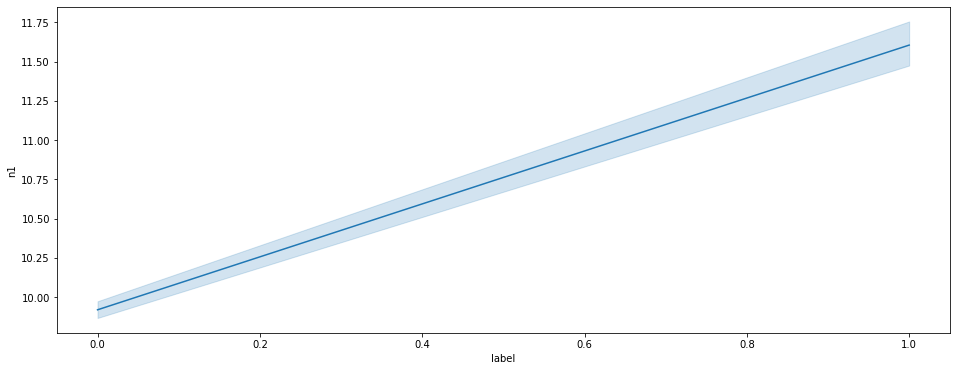

In [73]:
# line plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=numerical_train_data, x="label", y="n1")

<AxesSubplot:xlabel='label', ylabel='n14'>

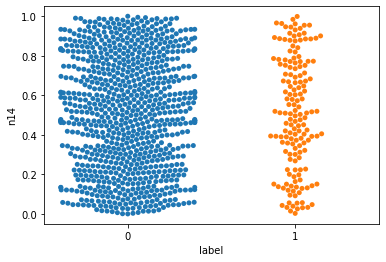

In [82]:
sns.swarmplot(x=numerical_train_data.label[:1000],
              y=numerical_train_data['n14'][:1000])

## Train data

In [15]:
# y = train_data.label
# X = train_data.drop(['label'], axis=1)

In [16]:
# train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)